<a href="https://colab.research.google.com/github/AlexanderSychev2005/Math_ML/blob/main/Differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segment 2: Computing Derivatives with Differentiation

In [9]:
import numpy as np
import matplotlib.pyplot as plt

Let's bring back our ol' buddy $y = x^2 + 2x + 2$:

In [1]:
def f(my_x):
    my_y = my_x**2 + 2*my_x + 2
    return my_y

In [6]:
x = np.linspace(-10, 10, 10000)

In [7]:
y = f(x)

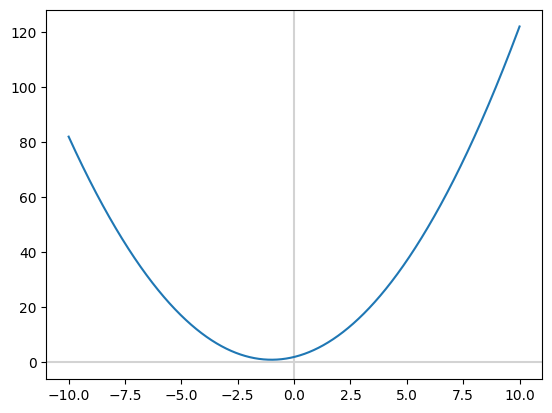

In [10]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
_ = ax.plot(x,y)

In [11]:
f(2)

10

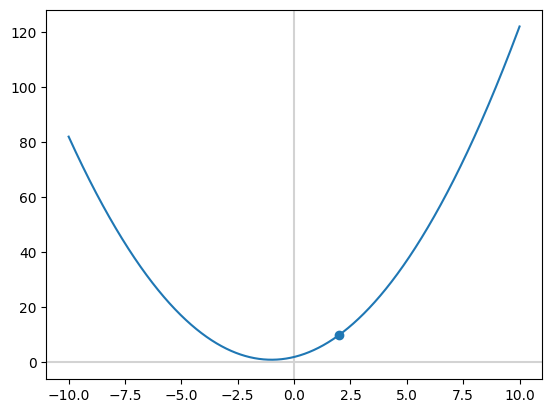

In [12]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10) # new
_ = ax.plot(x,y)

In [13]:
f(5)

37

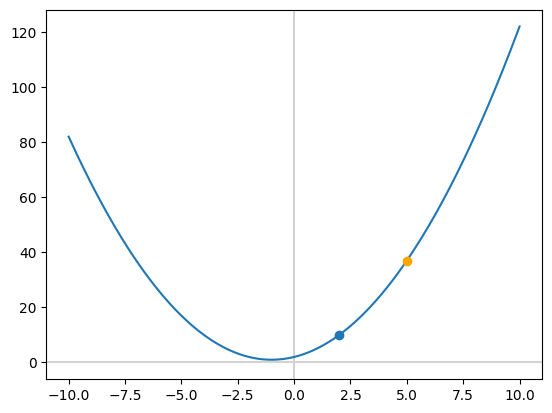

In [14]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5, 37, c = 'orange', zorder=3) # new
_ = ax.plot(x,y)

To find the slope $m$ between points $P$ and $Q$:
$$m = \frac{\text{change in }y}{\text{change in }x} = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1} = \frac{37-10}{5-2} = \frac{27}{3} = 9$$

In [16]:
m = (37-10)/(5-2)
m

9.0

To plot the line that passes through $P$ and $Q$, we can rearrange the equation of a line $y = mx + b$ to solve for $b$:
$$b = y - mx$$

In [17]:
b = 37-m*5
b

-8.0

In [18]:
line_y = m*x + b

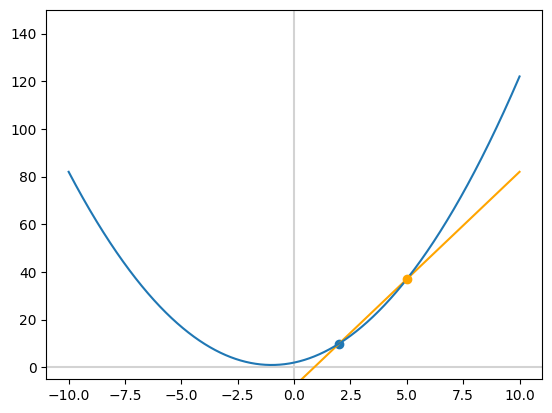

In [19]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(5, 37, c='orange', zorder=3)
plt.ylim(-5, 150) # new
plt.plot(x, line_y, c='orange') # new
_ = ax.plot(x,y)

In [20]:
f(2.1)

10.61

In [21]:
m = (10.61-10)/(2.1-2)
m

6.099999999999989

In [22]:
b = 10.61-m*2.1
b

-2.199999999999978

In [23]:
line_y = m*x + b

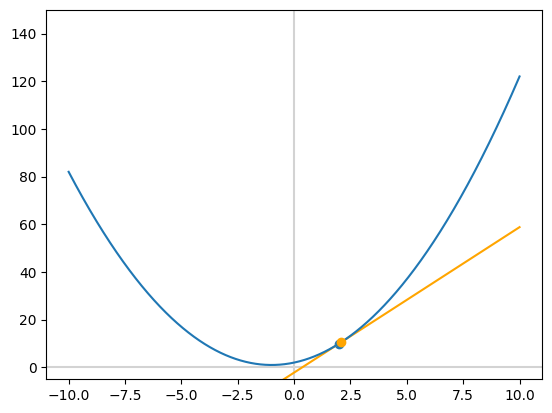

In [25]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(2, 10)
plt.scatter(2.1, 10.61, c='orange', zorder=3)
plt.ylim(-5, 150) # new
plt.plot(x, line_y, c='orange') # new
_ = ax.plot(x,y)

In [26]:
delta_x = 0.000001
delta_x

1e-06

In [27]:
x1 = 2
y1 = 10

In [28]:
x2 = x1 + delta_x
x2

2.000001

In [29]:
y2 = f(x2)
y2

10.000006000001001

In [30]:
m = (y2 - y1)/(x2 - x1)
m

6.000001000088901

In [31]:
x1 = -1

In [32]:
y1 = f(x1)
y1

1

In [33]:
delta_x

1e-06

In [34]:
x2 = x1 + delta_x
x2

-0.999999

In [35]:
y2 = f(x2)
y2

1.000000000001

In [36]:
y2 = f(x1 + delta_x)
y2

1.000000000001

In [37]:
m = (y2-y1)/(x2-x1)
m

1.0000889005535828e-06

In [38]:
b = y2-m*x2
b

1.0000010000889006

In [39]:
line_y = m*x + b

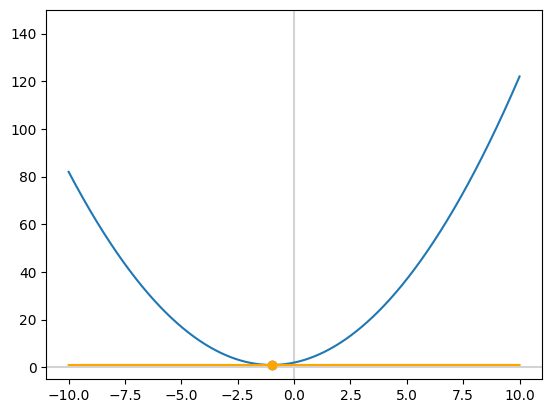

In [40]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.scatter(x1, y1)
plt.scatter(x2, y2, c='orange', zorder=3)
plt.ylim(-5, 150)
plt.plot(x, line_y, c='orange', zorder=3)
_ = ax.plot(x,y)

As $Q$ becomes infinitely close to $P$:
* $x_2$ - $x_1$ approaches 0
* In other words, $\Delta x$ approaches 0
* This can be denoted as $\Delta x \to 0$

Using the delta method, we've derived the definition of differentiation from first principles. The derivative of $y$ (denoted $dy$) with respect to $x$ (denoted $dx$) can be represented as:
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x}$$

Expanding $\Delta y$ out to $y_2 - y_1$:
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{y_2 - y_1}{\Delta x}$$

Finally, replacing $y_1$ with $f(x)$ and replacing $y_2$ with $f(x + \Delta x)$, we obtain a common representation of differentiation:
$$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

In [41]:
def diff_demo(my_f, my_x, my_delta):
    return (my_f(my_x + my_delta) - my_f(my_x)) / my_delta

In [42]:
deltas = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

In [43]:
for delta in deltas:
    print(diff_demo(f, 2, delta))

7.0
6.099999999999994
6.009999999999849
6.000999999999479
6.000100000012054
6.000009999951316
6.000001000927568


In [44]:
for delta in deltas:
    print(diff_demo(f, -1, delta))

1.0
0.10000000000000009
0.009999999999998899
0.001000000000139778
9.99999993922529e-05
1.000000082740371e-05
1.000088900582341e-06


## Segment 3: Automatic Differentiation

**TensorFlow** and **PyTorch** are the two most popular automatic differentiation libraries.

Let's use them to calculate $dy/dx$ at $x = 5$ where:

$$y = x^2$$

$$ \frac{dy}{dx} = 2x = 2(5) = 10 $$

In [45]:
import torch

In [46]:
x = torch.tensor(5.0)

In [47]:
x

tensor(5.)

In [48]:
x.requires_grad_() # contagiously track gradients through forward pass

tensor(5., requires_grad=True)

In [49]:
y = x**2

In [50]:
y.backward() # use autodiff

In [51]:
x.grad

tensor(10.)

In [52]:
import tensorflow as tf

In [53]:
x = tf.Variable(5.0)

In [54]:
with tf.GradientTape() as t:
    t.watch(x) # track forward pass
    y = x**2

In [55]:
t.gradient(y, x) # use autodiff

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

## Regression in Pytorch

In [56]:
import torch
import matplotlib.pyplot as plt

In [57]:
x = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.]) # E.g.: Dosage of drug for treating Alzheimer's disease
x

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [62]:
y = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37]) # E.g.: Patient's "forgetfulness score"
y

tensor([ 1.8600,  1.3100,  0.6200,  0.3300,  0.0900, -0.6700, -1.2300, -1.3700])

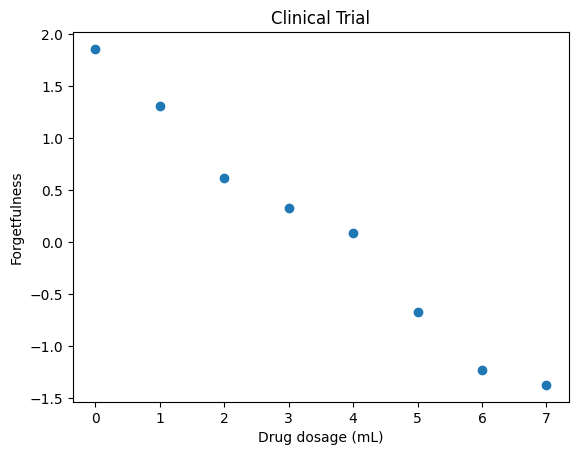

In [63]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
_ = ax.scatter(x, y)

In [64]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [65]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

In [66]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [67]:
def regression_plot(my_x, my_y, my_m, my_b):

    fig, ax = plt.subplots()

    ax.scatter(my_x, my_y)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max])

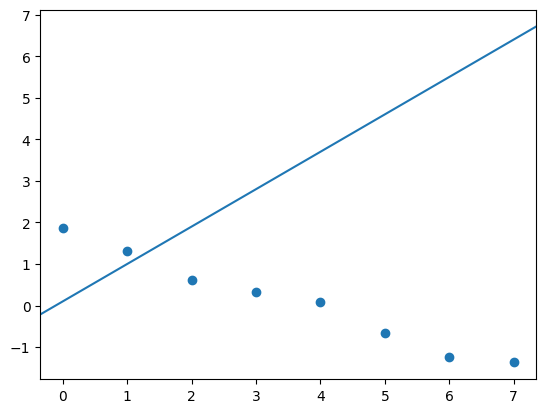

In [68]:
regression_plot(x, y, m, b)

In [69]:
yhat = regression(x, m, b)
yhat

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [70]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [71]:
C = mse(yhat, y)
C

tensor(19.6755, grad_fn=<DivBackward0>)

### Step 3: Use autodiff to calculate gradient of w.r.t. parameters

In [72]:
C.backward()

In [73]:
m.grad

tensor([36.3050])

In [74]:
b.grad

tensor([6.2650])

### Step 4: Gradient descent

In [75]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [76]:
optimizer.step()

In [77]:
m

tensor([0.5369], requires_grad=True)

In [78]:
b

tensor([0.0374], requires_grad=True)

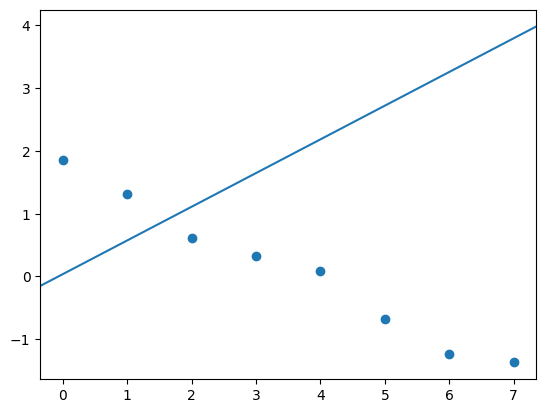

In [79]:
regression_plot(x, y, m, b)

In [80]:
C = mse(regression(x, m, b), y)
C

tensor(8.5722, grad_fn=<DivBackward0>)

In [81]:
epochs = 1000

In [82]:
for epoch in range(epochs):
  optimizer.zero_grad() # Reset gradients to zero; else they accumulate
  yhat = regression(x, m, b) # Step 1
  C = mse(yhat, y) # Step 2

  C.backward() # Step 3
  optimizer.step() # Step 4
  print('Epoch {}, cost {}, m grad {}, b grad {}'.format(epoch, '%.3g' % C.item(), '%.3g' % m.grad.item(), '%.3g' % b.grad.item()))

Epoch 0, cost 8.57, m grad 23.2, b grad 3.6
Epoch 1, cost 4.08, m grad 14.8, b grad 1.91
Epoch 2, cost 2.25, m grad 9.49, b grad 0.831
Epoch 3, cost 1.51, m grad 6.11, b grad 0.15
Epoch 4, cost 1.2, m grad 3.96, b grad -0.28
Epoch 5, cost 1.07, m grad 2.59, b grad -0.552
Epoch 6, cost 1.01, m grad 1.72, b grad -0.723
Epoch 7, cost 0.981, m grad 1.17, b grad -0.829
Epoch 8, cost 0.962, m grad 0.82, b grad -0.894
Epoch 9, cost 0.948, m grad 0.595, b grad -0.934
Epoch 10, cost 0.936, m grad 0.452, b grad -0.957
Epoch 11, cost 0.925, m grad 0.361, b grad -0.969
Epoch 12, cost 0.915, m grad 0.302, b grad -0.975
Epoch 13, cost 0.904, m grad 0.265, b grad -0.977
Epoch 14, cost 0.894, m grad 0.241, b grad -0.976
Epoch 15, cost 0.884, m grad 0.225, b grad -0.973
Epoch 16, cost 0.874, m grad 0.214, b grad -0.969
Epoch 17, cost 0.864, m grad 0.207, b grad -0.965
Epoch 18, cost 0.854, m grad 0.202, b grad -0.96
Epoch 19, cost 0.845, m grad 0.199, b grad -0.955
Epoch 20, cost 0.835, m grad 0.196, b

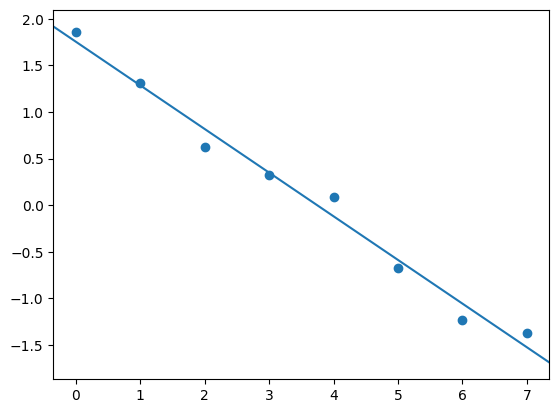

In [83]:
regression_plot(x, y, m, b)

In [84]:
m.item()

-0.4681258499622345

In [85]:
b.item()

1.7542961835861206